# Vibrations Analysis Tutorial

**Lorena A. Barba, June 1, 2024**

## Introduction

A raw draft of this notebook was generated by [Jupyter AI](https://github.com/jupyterlab/jupyter-ai) with the following prompt:

> /generate A tutorial for an engineering course that consist of approximately the following: 
>
> **Activity: Analysis of Vibrations in Mechanical Systems**
>
> In this activity, students will develop a program to analyze and visualize vibrations in a mechanical system, such as a spring-mass system. This aligns with the course objective of analyzing and calculating vibrations in mechanical systems.
>
> Steps:
> 1. Define the parameters of the system: mass, spring constant, damping coefficient, and initial conditions.
> 2. Write down the differential equation that describes the system's motion using symbolic computations in SymPy.
> 3. Solve the differential equation numerically over time using SciPy's ODE solver.
> 4. Plot the displacement of the mass over time using Matplotlib to visualize the vibrations.
> 5. Change the parameters of the system to observe different types of motion: underdamped, overdamped, and critically damped.
> 6. Calculate the total mechanical energy (kinetic + potential) at different points in time to verify energy conservation.

The Jupyter notebook provides a tutorial for an engineering course on the analysis of vibrations in mechanical systems. It includes steps such as defining system parameters (mass, spring constant, damping coefficient), writing the differential equation using SymPy, solving it numerically with SciPy, plotting displacement over time with Matplotlib, changing system parameters to observe different types of motion, and calculating total mechanical energy for energy conservation. This tutorial aligns with the course objective of analyzing and calculating vibrations in mechanical systems, making it a valuable resource for students.

--- 

Below this short description, the generated notebook had only code cells with no explanation. I used the Jupyter AI chat interface to ask for individual explanations for each code cell, with prompts like: "Explain for a beginner, step-by-step, what this code is doing (don't explain the comments)." Or sometimes "Explain this code, and how it fits in the context of this tutorial." I added edited versions of the results in the notebook, to complete the tutorial. I also made some adjustments to the code and to the parameter choices, and added guidance for learners to experiment with these.

## Write Differential Equation

We will use **SymPy**: a Python library for symbolic mathematics. In the next code cell, we are importing the `sympy` library, and assigning it he alias `sp` for easier reference in the subsequent code.

In [1]:
# Import the library
import sympy as sp

**Symbol Definition:** The next lines of code are defining symbols and functions using SymPy:

- `t = sp.symbols('t')`: This line defines a symbol `t` to represent time in the mathematical expressions you will work with.
- `x = sp.Function('x')(t)`: This line defines a function `x(t)` using SymPy. The notation `sp.Function('x')(t)` creates a function symbol `x(t)` that represents displacement as a function of time.
- `m, k, c = sp.symbols('m k c')`: This line defines symbols `m`, `k`, and `c` to represent mass, stiffness, and damping coefficient, respectively.

In sum, this code cell sets up the symbolic variables and functions needed for the differential equation representing a vibrating mass on a spring, with damping. The variables `t`, `x`, `m`, `k`, and `c` are defined to represent time, displacement function, mass, stiffness, and damping coefficient, respectively, in the subsequent steps in the tutorial.

In [2]:
# Define the variables and parameters
t = sp.symbols('t')  # time variable
x = sp.Function('x')(t)  # displacement function
m, k, c = sp.symbols('m k c')  # mass, stiffness, damping coefficient

The next code cell defines a differential equation of motion for a damped harmonic oscillator using the symbols and functions that were previously defined. Here's a breakdown of what the code is doing:

1. **Differential Equation Definition**:
   - `diff_eq = m*x.diff(t, t) + c*x.diff(t) + k*x`: In this line, a differential equation representing the motion of a damped harmonic oscillator is defined. 
     - `m*x.diff(t, t)` represents the mass `m` multiplied by the second derivative of the displacement function `x` with respect to time `t`, which accounts for the inertia term.
     - `c*x.diff(t)` represents the damping coefficient `c` multiplied by the first derivative of the displacement function `x` with respect to time `t`, which accounts for the damping term.
     - `k*x` represents the spring constant `k` multiplied by the displacement function `x`, which accounts for the spring force.
   - This equation combines the effects of mass, damping, and stiffness in the motion of the oscillator.

2. **Displaying the Differential Equation**:
   - `diff_eq`: This line by itself displays the differential equation `diff_eq` in a Jupyter notebook cell. When you execute this code cell, you will see the equation displayed as the output.

In summary, this code cell is symbolically defining a differential equation that describes the motion of a damped harmonic oscillator based on the system parameters (mass, damping coefficient, spring constant) and the displacement function previously defined.

In [3]:
# Define the differential equation of motion for a damped harmonic oscillator
diff_eq = m*x.diff(t, t) + c*x.diff(t) + k*x
diff_eq

c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2))

**LB adds:** The above steps only defined an ordinary differential equation symbolically. After defining the equation using SymPy, we may want to solve it algebraically using the [`dsolve()`](https://docs.sympy.org/latest/modules/solvers/ode.html#sympy.solvers.ode.dsolve) function, giving the general solution to the DE, then display the solution, and finally verify the solution using the [`checkodesol()`](https://docs.sympy.org/latest/modules/solvers/ode.html#sympy.solvers.ode.checkodesol) function of SymPy. See also the documentation about [defining derivatives](https://docs.sympy.org/latest/guides/solving/solve-ode.html#defining-derivatives) using SymPy.

In [4]:
# Solve the differential equation
solution = sp.dsolve(diff_eq, x)

In [5]:
# Display the solution
print("The general solution to the differential equation is:")
display(solution)

The general solution to the differential equation is:


Eq(x(t), C1*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))

In [6]:
# Verify the solution
sp.checkodesol(diff_eq, solution)

(True, 0)

## Solve Differential Equation Numerically

We may wish to solve the ODE numerically using SciPy, instead of symbolically using SymPy. We need to import the following into our running notebook:

- `import numpy as np`: This line imports the NumPy library and aliases it as `np`. NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- `from scipy.integrate import solve_ivp`: This line imports the `solve_ivp` function from the `scipy.integrate` module. SciPy is a scientific computing library that builds on NumPy and provides additional functionality for optimization, integration, interpolation, and more.

The `solve_ivp` function in SciPy is used for solving initial value problems of ordinary differential equations (ODEs). It allows users to numerically integrate a system of first-order ODEs given initial conditions. This is particularly useful for simulating and analyzing dynamical systems in various fields, including physics, engineering, and biology.

In [7]:
import numpy as np
from scipy.integrate import solve_ivp

The next code cell defines a Python function named `system_dynamics` that represents the dynamics of a system described by a differential equation. Its parameters are: 

- `t`: Time variable representing the current time.
- `y`: State vector representing the system's state at time `t`, which consists of position and velocity.

First, we definethe system parameters as follows:
- `mass`, `stiffness`, and `damping`: These variables represent the parameters for mass, stiffness, and damping coefficient. They are assigned specific values (`mass = 1.0, stiffness = 10.0, damping = 0.1`) within the function.

Inside the function:

- `position` and `velocity`: The state vector `y` is unpacked into `position` and `velocity` variables. These variables represent the position and velocity of the system at a given time.
- the acceleration of the system is computed using the equation of motion for a damped harmonic oscillator: `(-damping * velocity - stiffness * position) / mass`. This equation represents Newton's second law applied to the system, where the sum of forces equals mass times acceleration.

The function returns a list `[velocity, acceleration]`, which represents the derivative of the state vector `y`. Specifically, it returns the velocity and acceleration of the system at the current time `t`.

In [8]:
# Parameters of the system
mass = 1.0       # Mass of the system (kg)
stiffness = 10.0 # Spring constant (N/m)
damping = 0.1

# Define the differential equation representing the system dynamics
def system_dynamics(t, y):
    
    # Extract state variables
    position, velocity = y
    
    # Compute acceleration using the equation of motion
    acceleration = (-damping * velocity - stiffness * position) / mass
    
    return [velocity, acceleration]

<!--The original generated code had the parameter definitions inside the function. Even if that is a more modular solution with a fully self-contained function, and global variables are generally not good practice, in this case it defeats the point of allowing users to try different values of the parameters to explore the system dynamics-->

The next code cell initializes the state of the system by defining the initial position and velocity, as follows:

   - `initial_position = 1.0`: This line assigns the initial position of the system to `1.0`. It represents the position of the system at the start of the simulation.
   
   - `initial_velocity = 0.0`: This line assigns the initial velocity of the system to `0.0`. It represents the velocity of the system at the beginning of the simulation.
   
   - `initial_state = [initial_position, initial_velocity]`: This line creates a list `initial_state` that contains the initial position and velocity of the system. The list `[1.0, 0.0]` represents the initial state vector `[position, velocity]` of the system.

By defining `initial_position`, `initial_velocity`, and `initial_state`, the code sets up the initial conditions of the system before any dynamics or simulations are computed. These initial values are essential for starting the simulation and determining the system's behavior over time based on the defined dynamics.

In [9]:
# Initial conditions
initial_position = 1.0
initial_velocity = 0.0
initial_state = [initial_position, initial_velocity]

The next line of code sets the time span over which the simulation of the system dynamics will be carried out:

  - `t_span = (0, 10)`: This line creates a tuple `t_span` that specifies the start and end times for the simulation. In this case, the simulation will run from time `0` to time `10`.

By defining `t_span` as `(0, 10)`, the code establishes the time interval during which the system's behavior will be simulated. This determines how long the simulation will run and what time range will be covered in the analysis of the system dynamics. You can later play with this time span to explore the dynamics.

In [10]:
# Time span for the simulation
t_span = (0, 10)

The next code segment solves the equation numerically using SciPy's ODE solver. Let's break it down:

- `solve_ivp()`: This function from SciPy is used to solve initial value problems (IVPs) for systems of ordinary differential equations (ODEs) numerically. It integrates the system dynamics over a specified time span and returns the solution.
   `system_dynamics`: This parameter refers to a previously defined function that defines the dynamics of the system. It describes how the state of the system changes over time and depends on the current state and possibly other factors.
- `t_span`: This parameter defines the time span over which the simulation will run. It specifies the start and end times for the simulation.
- `initial_state`: This parameter provides the initial conditions of the system, such as initial position and velocity, which were defined earlier in the code.
- `t_eval=np.linspace(0, 10, 100)`: This parameter specifies the times at which the solver will output the values of the solution. In this case, it generates 100 evenly spaced time points between 0 and 10 at which the solution will be computed.
- The `solve_ivp()` function integrates the system dynamics defined in `system_dynamics` over the time span `t_span` starting from `initial_state`.

The computed solution, which contains the evolution of the system's state variables over time, is stored in the variable `solution`. This solution can be further analyzed or used for visualization.

In [11]:
# Solve the differential equation numerically using SciPy's ODE solver
solution = solve_ivp(system_dynamics, t_span, initial_state, 
                     t_eval=np.linspace(0, 10, 100))

When you call `solve_ivp()` from SciPy to solve ordinary differential equations (ODEs) numerically, it uses an adaptive-step-size Runge-Kutta method under the hood. The adaptive step size control mechanism balances accuracy and efficiency, meaning that the solver takes smaller steps in regions where the solution is changing rapidly and larger steps where the solution is more stable.

The next code segment extracts specific results from the solution obtained by solving the differential equation. The `solution` object typically contains the entire solution of the differential equation, including the time points and the values of all state variables at those time points.

- `time = solution.t`: This line extracts the time points at which the solution was computed. The variable `time` will now hold an array of time values corresponding to the solution at those specific time points.

- `position = solution.y[0]`: Here, it extracts the solution for the position (or the first state variable) from the `solution` object. The variable `position` will now contain an array of positions at the specified time points.

- `velocity = solution.y[1]`: Similarly, this line extracts the solution for the velocity (or the second state variable) from the `solution` object. The variable `velocity` will now hold an array of velocities at the specified time points.

The extracted `time`, `position`, and `velocity` arrays can be used for plotting graphs, analyzing the behavior of the system over time, or extracting specific information about the system's state variables at different time points.

In [12]:
# Extract the results
time = solution.t
position = solution.y[0]
velocity = solution.y[1]

## Plot Displacement Over Time

We're now ready to plot the solution. In the next line, we import the `pyplot` module from the `matplotlib` library and creating an alias `plt` for it. The `pyplot` module provides a simple interface for creating plots like line plots, bar plots, scatter plots, etc. 

The `as plt` part of the import statement creates an alias that allows you to refer to the `pyplot` module using the shorter name `plt` throughout your code. For example, instead of writing `matplotlib.pyplot.plot()`, you can now use `plt.plot()` to call the `plot()` function from the `pyplot` module.

In [13]:
import matplotlib.pyplot as plt

The next cell initializes variables to plot the exact solution for simple harmonic motion (no damping).

<!--The generated code here did not use the numerical solution, only the analytical solution for simple harmonic motion.-->

In [14]:
# Parameters
omega = np.sqrt(stiffness / mass)  # Natural frequency (rad/s)

# Calculate displacement over time for simple harmonic motion
displacement = np.cos(omega * time)

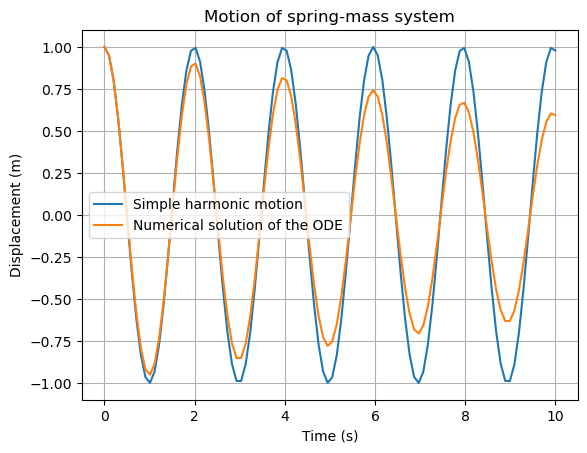

In [15]:
# Plot displacement over time
plt.figure()
plt.plot(time, displacement, label='Simple harmonic motion')
plt.plot(time, position, label='Numerical solution of the ODE')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Motion of spring-mass system')
plt.legend()
plt.grid()
plt.show()

## Change System Parameters

You can explore the system dynamics with different values for mass, spring constant, and damping coefficient, to observe how these changes affect the system's behavior. In particular, let's look at the behavior as the damping values increase.

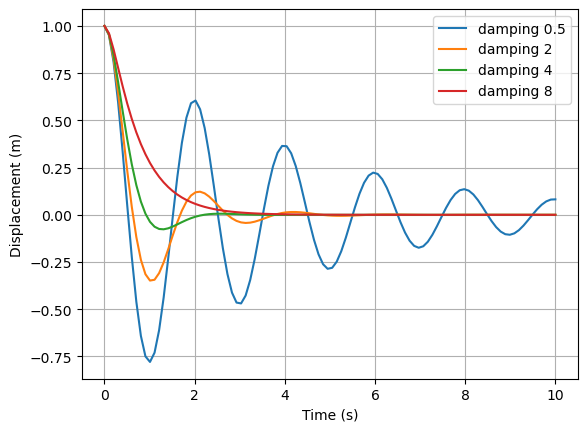

In [16]:
# Parameters of the system
mass = 1.0       # Mass of the system (kg)
stiffness = 10.0 # Spring constant (N/m)
damping_values = [0.5, 2, 4, 8]

plt.figure()
for i in range(len(damping_values)):
    damping = damping_values[i]
    
    # Solve the differential equation numerically using SciPy's ODE solver
    solution = solve_ivp(system_dynamics, t_span, initial_state, 
                     t_eval=np.linspace(0, 10, 100))
    # Extract the results
    time = solution.t
    position = solution.y[0]
    velocity = solution.y[1]


    plt.plot(time, position, label='damping {}'.format(damping))

plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid()
plt.show()

## Calculate Total Mechanical Energy

The total mechanical energy stored in the system consists of the sum of potential and kinetic energies, given by:

$$E = \frac{1}{2} k m^2 + \frac{1}{2}m v^2$$

The Python functions below define the two components of energy: the potential energy stored in the spring based on teh spring constant and the displacement of the spring, and the kinetic energy of an object based on its mass and velocity.

In [17]:
def kinetic_energy(mass, velocity):
    return 0.5 * mass * velocity**2

In [18]:
def potential_energy(stiffness, displacement):
    return 0.5 * stiffness * displacement**2

In the next snippet of code, we can solve the system dynamics again with new choice of parameters, and compute the different components of energy, to plot them below.

In [19]:
# Parameters of the system
mass = 1.0       # Mass of the system (kg)
stiffness = 10 # Spring constant (N/m)
damping = 0.5

# Solve the differential equation numerically using SciPy's ODE solver
solution = solve_ivp(system_dynamics, t_span, initial_state, 
                     t_eval=np.linspace(0, 10, 100))
# Extract the results
time = solution.t
position = solution.y[0]
velocity = solution.y[1]

kinetic = kinetic_energy(mass, velocity)
potential = potential_energy(stiffness, position)
total_energy = kinetic + potential


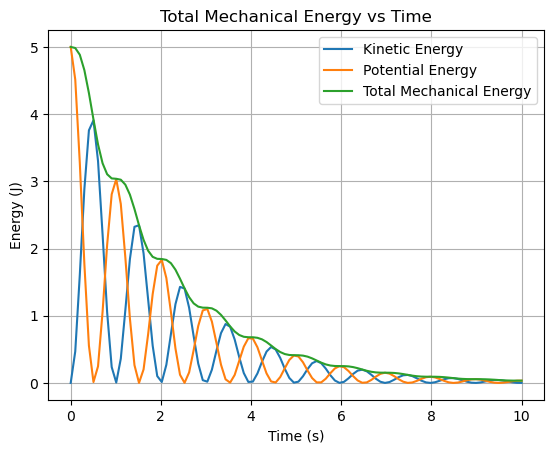

In [20]:
plt.figure()
plt.plot(time, kinetic, label='Kinetic Energy')
plt.plot(time, potential, label='Potential Energy')
plt.plot(time, total_energy, label='Total Mechanical Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Total Mechanical Energy vs Time')
plt.legend()
plt.grid()
plt.show()